# Pre-processing glucose data with detrending

This is a brief tutorial to describe the data detrending method used to pre-process the glucose CGM data.

We first need to load the raw, unprocessed glucose data.

In [1]:
import MSS.config as config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MSS.detrend_glucose import detrend_glucose

fname_gluc1 = 'tutorial-data/glucose_MSS06-1.csv'
gluc_db1 = pd.read_csv(fname_gluc1,index_col=False)

We extract the time variable (here to a variable X1) and the raw glucose data (here to a variable Y1). Note that the name of the glucose column may depend on the device used.

Next, we make a simple plot to visualise the raw glucose data over the full recording period.

Text(0, 0.5, 'Glucose (mmol/L)')

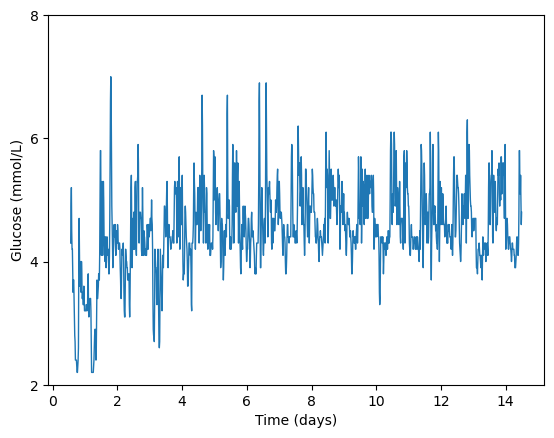

In [2]:
X1 = gluc_db1['abs_time_days'].values #here the units of time is days
Y1 = gluc_db1['Historic Glucose (mmol/L)'].values

plt.plot(X1,Y1,color=config.COLOR_GLUC,linewidth=1)
plt.ylim([2,8])
plt.yticks(np.arange(2, 9, step=2))  
plt.xlabel('Time (days)')
plt.ylabel('Glucose (mmol/L)')

In our dataset (recorded with the FreeStyle Pro device), we sometimes noticed long term trends in the data, where typically the glucose values are typically lower for the first few days. Instead of throwing away this data, we detrend the data using a Gaussian process with a lengthscale of 2 days. The lengthscale controls how aggressively the data is detrended. We use the 'detrend_glucose' function to extract both the fitted trend as well as the detrended data

In [4]:
trend, detrended = detrend_glucose(X1,Y1,lengthscale=2.)

Finally, we can check the fitted trend to the data

Text(0, 0.5, 'Glucose (mmol/L)')

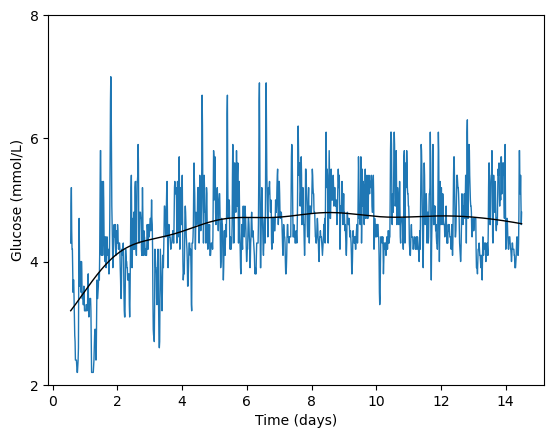

In [5]:
plt.plot(X1,Y1,color=config.COLOR_GLUC,linewidth=1)
plt.plot(X1,trend,color='k',linewidth=1)
plt.ylim([2,8])
plt.yticks(np.arange(2, 9, step=2))  
plt.xlabel('Time (days)')
plt.ylabel('Glucose (mmol/L)')

The fitted trend seems reasonable, so we can save the 'detrended' variable to a new file and use it for downstream analysis